In [34]:
import pandas as pd
from citipy import citipy
import matplotlib.pyplot as plt
import random
from random import uniform 
import requests
from pprint import pprint
from config import apikey
import numpy as np
from scipy.stats import linregress

In [35]:
#Initialize list variables which will store weather data
cities = []
weather = []
citylat = []
citylong = []
countries = []
temprature = []
humidity = []
cloudiness = []
wind_speed = []
cnt = 0
random_cities_weather_data_file = "random_cities_weather_data_file.csv"

In [36]:
#build base url for Openweather API with api key 
api_url = "http://api.openweathermap.org/data/2.5/weather?"
base_url = api_url + "appid=" + apikey 


In [37]:
def getweather_data(city_name,country_code):
    url = base_url + "&q=" + city_name + "," + country_code + "&units=imperial"
    city_weather_data_response = requests.get(url)
    city_weather_data = city_weather_data_response.json()
    city_temp = city_weather_data["main"]["temp"]
    city_wind_speed = city_weather_data["wind"]["speed"]
    city_cloudiness = city_weather_data["clouds"]["all"]
    city_humidity = city_weather_data["main"]["humidity"]
    return city_temp,city_wind_speed,city_cloudiness,city_humidity

In [38]:
while cnt < 600:
    long = random.uniform(-180.0,180.0)              #longitude ranges is from -180 to 180
    lat = random.uniform(-90.0, 90.0)                #latitude ranges is from -90 to 90
    city = citipy.nearest_city(lat, long)
    city_name = city.city_name
    country_code = city.country_code
    try:
        dup_city = cities.index(city_name)
    except ValueError:
        url = base_url + "&q=" + city_name + "," + country_code + "&units=imperial"
        city_weather_data_response = requests.get(url)
        city_weather_data = city_weather_data_response.json()
        if city_weather_data["cod"] != "404":  
            city_temp = city_weather_data["main"]["temp"]
            city_wind_speed = city_weather_data["wind"]["speed"]
            city_cloudiness = city_weather_data["clouds"]["all"]
            city_humidity = city_weather_data["main"]["humidity"]
            #city_temp,city_wind_speed,city_cloudiness,city_humidity = getweather_data(city_name,country_code)

            temprature.append(city_temp) 
            humidity.append(city_humidity)
            cloudiness.append(city_cloudiness)
            wind_speed.append(city_wind_speed)
            cities.append(city_name)
            citylat.append(lat)
            citylong.append(long)
            countries.append(country_code)
            print(f'Collecting Weather Information for city :{city_name} City Number :{cnt}')
            cnt += 1
        else:
            print("City Not Found... skipping")     
    else:
        print(f'{city_name} in Country: {country_code} already Added to list')      

City Not Found... skipping
ushuaia in Country: ar already Added to list
City Not Found... skipping
alofi in Country: nu already Added to list
georgetown in Country: sh already Added to list
rikitea in Country: pf already Added to list
City Not Found... skipping
atuona in Country: pf already Added to list
port alfred in Country: za already Added to list
ushuaia in Country: ar already Added to list
ushuaia in Country: ar already Added to list
kapaa in Country: us already Added to list
saint-philippe in Country: re already Added to list
avarua in Country: ck already Added to list
saint-philippe in Country: re already Added to list
City Not Found... skipping
rikitea in Country: pf already Added to list
ushuaia in Country: ar already Added to list
rikitea in Country: pf already Added to list
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
ushuaia in Country: ar already Added to list
port alfred in Country: za already Added to list
City Not Found... skipping


City Not Found... skipping
castro in Country: cl already Added to list
hobart in Country: au already Added to list
alofi in Country: nu already Added to list
mar del plata in Country: ar already Added to list
cape town in Country: za already Added to list
rikitea in Country: pf already Added to list
City Not Found... skipping
mar del plata in Country: ar already Added to list
port alfred in Country: za already Added to list
teya in Country: ru already Added to list
City Not Found... skipping
hilo in Country: us already Added to list
puerto ayora in Country: ec already Added to list
City Not Found... skipping
ushuaia in Country: ar already Added to list
kodiak in Country: us already Added to list
albany in Country: au already Added to list
cape town in Country: za already Added to list
saint-philippe in Country: re already Added to list
ushuaia in Country: ar already Added to list
thompson in Country: ca already Added to list
City Not Found... skipping
City Not Found... skipping
City No

qaanaaq in Country: gl already Added to list
rikitea in Country: pf already Added to list
bengkulu in Country: id already Added to list
busselton in Country: au already Added to list
kodiak in Country: us already Added to list
mahebourg in Country: mu already Added to list
pisco in Country: pe already Added to list
georgetown in Country: sh already Added to list
mar del plata in Country: ar already Added to list
upernavik in Country: gl already Added to list
City Not Found... skipping
City Not Found... skipping
barrow in Country: us already Added to list
bredasdorp in Country: za already Added to list
castro in Country: cl already Added to list
chokurdakh in Country: ru already Added to list
castro in Country: cl already Added to list
City Not Found... skipping
kapaa in Country: us already Added to list
rikitea in Country: pf already Added to list
east london in Country: za already Added to list
port alfred in Country: za already Added to list
rikitea in Country: pf already Added to li

City Not Found... skipping
bredasdorp in Country: za already Added to list
City Not Found... skipping
alofi in Country: nu already Added to list
ribeira grande in Country: pt already Added to list
jamestown in Country: sh already Added to list
rikitea in Country: pf already Added to list
hilo in Country: us already Added to list
rikitea in Country: pf already Added to list
yellowknife in Country: ca already Added to list
City Not Found... skipping
City Not Found... skipping
victoria in Country: sc already Added to list
hithadhoo in Country: mv already Added to list
punta arenas in Country: cl already Added to list
hobart in Country: au already Added to list
City Not Found... skipping
saint george in Country: bm already Added to list
khatanga in Country: ru already Added to list
saskylakh in Country: ru already Added to list
lebu in Country: cl already Added to list
City Not Found... skipping
City Not Found... skipping
bambous virieux in Country: mu already Added to list
ushuaia in Coun

hilo in Country: us already Added to list
bluff in Country: nz already Added to list
georgetown in Country: sh already Added to list
east london in Country: za already Added to list
rikitea in Country: pf already Added to list
albany in Country: au already Added to list
ushuaia in Country: ar already Added to list
port alfred in Country: za already Added to list
harper in Country: lr already Added to list
khatanga in Country: ru already Added to list
qaanaaq in Country: gl already Added to list
yellowknife in Country: ca already Added to list
hilo in Country: us already Added to list
hobart in Country: au already Added to list
City Not Found... skipping
rikitea in Country: pf already Added to list
ushuaia in Country: ar already Added to list
talnakh in Country: ru already Added to list
rikitea in Country: pf already Added to list
alta floresta in Country: br already Added to list
City Not Found... skipping
ushuaia in Country: ar already Added to list
rikitea in Country: pf already Adde

ushuaia in Country: ar already Added to list
port alfred in Country: za already Added to list
carnarvon in Country: au already Added to list
portland in Country: au already Added to list
puerto ayora in Country: ec already Added to list
vaini in Country: to already Added to list
atuona in Country: pf already Added to list
ushuaia in Country: ar already Added to list
cape town in Country: za already Added to list
ushuaia in Country: ar already Added to list
port alfred in Country: za already Added to list
tiksi in Country: ru already Added to list
talnakh in Country: ru already Added to list
kahului in Country: us already Added to list
tasiilaq in Country: gl already Added to list
rikitea in Country: pf already Added to list
san patricio in Country: mx already Added to list
rikitea in Country: pf already Added to list
City Not Found... skipping
rikitea in Country: pf already Added to list
City Not Found... skipping
vaini in Country: to already Added to list
torbay in Country: ca already

portland in Country: au already Added to list
pevek in Country: ru already Added to list
leningradskiy in Country: ru already Added to list
rikitea in Country: pf already Added to list
salalah in Country: om already Added to list
ushuaia in Country: ar already Added to list
hermanus in Country: za already Added to list
jamestown in Country: sh already Added to list
port elizabeth in Country: za already Added to list
new norfolk in Country: au already Added to list
butaritari in Country: ki already Added to list
hithadhoo in Country: mv already Added to list
punta arenas in Country: cl already Added to list
kapaa in Country: us already Added to list
ponta do sol in Country: cv already Added to list
City Not Found... skipping
nikolskoye in Country: ru already Added to list
hobart in Country: au already Added to list
City Not Found... skipping
tiksi in Country: ru already Added to list
cape town in Country: za already Added to list
hilo in Country: us already Added to list
City Not Found.

dikson in Country: ru already Added to list
kapaa in Country: us already Added to list
ushuaia in Country: ar already Added to list
mar del plata in Country: ar already Added to list
dikson in Country: ru already Added to list
vostok in Country: ru already Added to list
hambantota in Country: lk already Added to list
ushuaia in Country: ar already Added to list
chokurdakh in Country: ru already Added to list
port alfred in Country: za already Added to list
tasiilaq in Country: gl already Added to list
faanui in Country: pf already Added to list
bathsheba in Country: bb already Added to list
dingle in Country: ie already Added to list
punta arenas in Country: cl already Added to list
saldanha in Country: za already Added to list
vaini in Country: to already Added to list
saint-philippe in Country: re already Added to list
kapaa in Country: us already Added to list
mahebourg in Country: mu already Added to list
City Not Found... skipping
rikitea in Country: pf already Added to list
avaru

City Not Found... skipping
atambua in Country: id already Added to list
City Not Found... skipping
punta arenas in Country: cl already Added to list
City Not Found... skipping
longyearbyen in Country: sj already Added to list
saint-philippe in Country: re already Added to list
ushuaia in Country: ar already Added to list
punta arenas in Country: cl already Added to list
City Not Found... skipping
jamestown in Country: sh already Added to list
jamestown in Country: sh already Added to list
rikitea in Country: pf already Added to list
mahebourg in Country: mu already Added to list
cape town in Country: za already Added to list
kapaa in Country: us already Added to list
punta arenas in Country: cl already Added to list
vaini in Country: to already Added to list
dikson in Country: ru already Added to list
ostrovnoy in Country: ru already Added to list
City Not Found... skipping
City Not Found... skipping
City Not Found... skipping
rikitea in Country: pf already Added to list
sao joao da ba

lorengau in Country: pg already Added to list
rikitea in Country: pf already Added to list
cape town in Country: za already Added to list
ushuaia in Country: ar already Added to list
rikitea in Country: pf already Added to list
rikitea in Country: pf already Added to list
kodiak in Country: us already Added to list
City Not Found... skipping
atuona in Country: pf already Added to list
City Not Found... skipping
cabo san lucas in Country: mx already Added to list
qaanaaq in Country: gl already Added to list
east london in Country: za already Added to list
port shepstone in Country: za already Added to list
City Not Found... skipping
City Not Found... skipping
rikitea in Country: pf already Added to list
ushuaia in Country: ar already Added to list
lorengau in Country: pg already Added to list
butaritari in Country: ki already Added to list
faanui in Country: pf already Added to list
atuona in Country: pf already Added to list
tasiilaq in Country: gl already Added to list
butaritari in C

jamestown in Country: sh already Added to list
rikitea in Country: pf already Added to list
City Not Found... skipping
City Not Found... skipping
vao in Country: nc already Added to list
touros in Country: br already Added to list
butaritari in Country: ki already Added to list
kapaa in Country: us already Added to list
kahului in Country: us already Added to list
kangaatsiaq in Country: gl already Added to list
vaini in Country: to already Added to list
nanortalik in Country: gl already Added to list
vaini in Country: to already Added to list
City Not Found... skipping
puerto ayora in Country: ec already Added to list
City Not Found... skipping
ushuaia in Country: ar already Added to list
torbay in Country: ca already Added to list
saskylakh in Country: ru already Added to list
City Not Found... skipping
yellowknife in Country: ca already Added to list
puerto ayora in Country: ec already Added to list
busselton in Country: au already Added to list
vila velha in Country: br already Add

In [39]:
#Create dataframe on city weather data
weather_dict = {"City_Name": cities,
                "Country_Code": countries,
                "Latitude": citylat,
                "Longititude": citylong,
                "Temprature": temprature,
                "Humidity" : humidity,
                "cloudiness": cloudiness,
                "wind_speed": wind_speed}
weather_df = pd.DataFrame(weather_dict)

In [40]:
weather_df

,City_Name,Country_Code,Latitude,Longititude,Temprature,Humidity,cloudiness,wind_speed
0,saint-philippe,re,-56.221530,66.735628,76.82,65,20,23.04
1,dukuhturi,id,-6.836002,108.847204,87.12,64,69,6.13
2,nuuk,gl,65.340080,-50.845383,30.09,86,89,4.70
3,new norfolk,au,-67.252573,128.168859,57.18,63,40,11.41
4,hermanus,za,-82.309958,9.655245,63.00,76,2,8.01
...,...,...,...,...,...,...,...,...
595,maningrida,au,-10.580431,134.192085,87.49,53,94,11.45
596,zhanaozen,kz,42.568974,52.839223,53.08,47,98,6.06
597,diffa,ne,14.528670,12.323610,88.12,15,72,15.48
598,tabas,ir,34.573526,57.556902,73.51,15,0,1.83


In [41]:
weather_df.to_csv(random_cities_weather_data_file)

# Part I - WeatherPy
- Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
- Save the plotted figures as .pngs.
#### Latitude vs. Temperature Plot

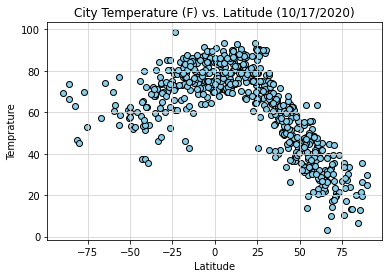

In [42]:
x_axis = weather_df["Latitude"]
y_axis = weather_df["Temprature"]
plt.xlabel("Latitude")
plt.ylabel("Temprature")
plt.title("City Temperature (F) vs. Latitude (10/17/2020)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="skyblue")
plt.savefig("latVstemp.png")
plt.show()

#### Latitude vs. Humidity

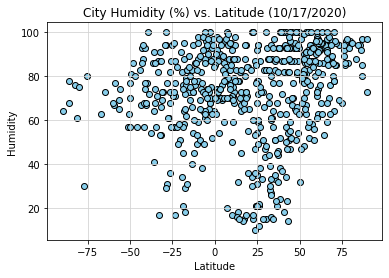

In [43]:
x_axis = weather_df["Latitude"]
y_axis = weather_df["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Humidity (%) vs. Latitude (10/17/2020)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="skyblue")
plt.savefig("latVshumidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

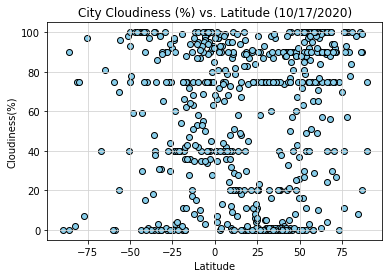

In [44]:
x_axis = weather_df["Latitude"]
y_axis = weather_df["cloudiness"]
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title("City Cloudiness (%) vs. Latitude (10/17/2020)")
plt.grid(b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="skyblue")
plt.savefig("latVsclouddiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

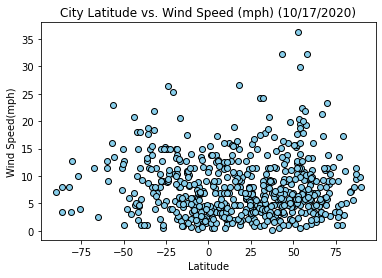

In [45]:
x_axis = weather_df["Latitude"]
y_axis = weather_df["wind_speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title("City Latitude vs. Wind Speed (mph) (10/17/2020)")
plt.scatter(x_axis,y_axis,edgecolors="black",facecolors="skyblue")
plt.savefig("latVswind.png")
plt.show()

# Part 2 - WeatherPy
- Northern Hemisphere (greater than or equal to 0 degrees latitude) 
- Southern Hemisphere (less than 0 degrees latitude)

In [46]:
northern_hemisphere_weather_df = weather_df.loc[weather_df["Latitude"] >=0]
northern_hemisphere_weather_df.reset_index(inplace = True)

In [47]:
southern_hemisphere_weather_df = weather_df.loc[weather_df["Latitude"] < 0]
southern_hemisphere_weather_df.reset_index(inplace = True)

In [48]:
northern_hemisphere_weather_df.head(4)

,index,City_Name,Country_Code,Latitude,Longititude,Temprature,Humidity,cloudiness,wind_speed
0,2,nuuk,gl,65.340080,-50.845383,30.09,86,89,4.70
1,6,hilo,us,9.694530,-141.248681,71.80,78,1,2.66
2,7,khatanga,ru,80.367111,107.015757,13.53,95,84,10.98
3,10,lagoa,pt,46.232875,-33.669705,62.56,70,81,13.91


In [49]:
southern_hemisphere_weather_df.head(4)

,index,City_Name,Country_Code,Latitude,Longititude,Temprature,Humidity,cloudiness,wind_speed
0,0,saint-philippe,re,-56.221530,66.735628,76.82,65,20,23.04
1,1,dukuhturi,id,-6.836002,108.847204,87.12,64,69,6.13
2,3,new norfolk,au,-67.252573,128.168859,57.18,63,40,11.41
3,4,hermanus,za,-82.309958,9.655245,63.00,76,2,8.01


In [50]:
def run_LinearRegression(xdata,ydata,xlabel,ylabel,labelpos,file_name):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata, ydata)
    print(f"The relation value is: {rvalue}")
    regress_values = xdata * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.xlabel(xlabel)
    plt.ylabel(ylabel) 
    plt.scatter(xdata,ydata,edgecolors="black",facecolors="skyblue")
    plt.plot(xdata,regress_values,"r-")
    plt.annotate(line_eq,labelpos,fontsize=15,color="red")
    plt.savefig(f"{file_name}.png")


#### Northern Hemisphere - Temperature (F) vs. Latitude  Linear Regression
- Plot  Linear Regression Northern Hemisphere - Temperature (F) vs. Latitude

The relation value is: -0.8909572156510589


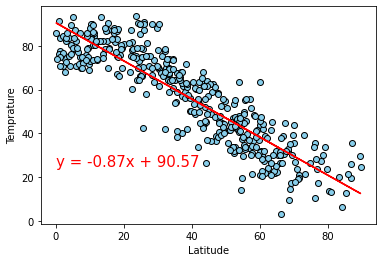

In [51]:
xlabel = "Latitude"
ylabel = "Temprature"
labelpos = (0,25)
file_name = "part2_north_latVStemp"
run_LinearRegression(northern_hemisphere_weather_df[xlabel],northern_hemisphere_weather_df[ylabel],
                     xlabel,ylabel,labelpos,file_name)

Analysis : ->Northern Hemisphere cities have very strong corealation with Temprature. As relation value shows the value -0.89 which is very close to 1 ans also from above graph as cities which are away from equator temporartue of those cities going down as compare to cities which are closer to  equator

###### Southern Hemisphere - Temperature (F) vs. Latitude  Linear Regression
- Plot  Linear Regression Southern Hemisphere - Temperature (F) vs. Latitude

The relation value is: 0.5426493571389939


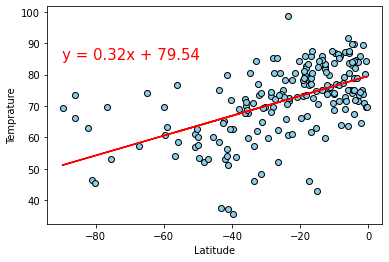

In [52]:
xlabel = "Latitude"
ylabel = "Temprature"
labelpos = (-90,85)
file_name = "part2_south_latVStemp"
run_LinearRegression(southern_hemisphere_weather_df[xlabel],southern_hemisphere_weather_df[ylabel],
                     xlabel,ylabel,labelpos,file_name)

Analysis :-> Southern Hemisphere cities have  strong corealation with Temprature. As relation value shows the value 0.6186852856184885 which is close to 1 also from above graph as cities which are away from equator Temperature of those cities going down as compare to cities which are closer to equator



#### Northern Hemisphere - Humidity (%) vs. Latitude  Linear Regression
- Plot  Linear Regression Northern Hemisphere - Humidity (%) vs. Latitude

The relation value is: 0.2612244999523174


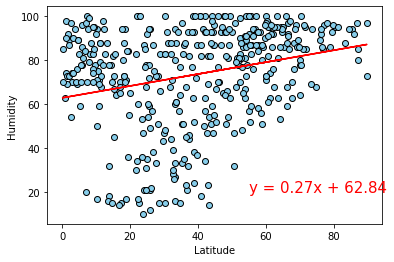

In [53]:
xlabel = "Latitude"
ylabel = "Humidity"
labelpos = (55,20)
file_name = "part2_north_humidityVSlat"
run_LinearRegression(northern_hemisphere_weather_df[xlabel],northern_hemisphere_weather_df[ylabel],
                     xlabel,ylabel,labelpos,file_name)

Analysis : ->Northern Hemisphere cities have week co-realation with Humidity. As relation value shows the value 0.2814 which is very far to 1 ans also from above graph as cities which are away from equator or near to equator does not show much difference in humidity.

#### Southern Hemisphere - Humidity (%) vs. Latitude  Linear Regression
- Plot  Linear Regression Southern Hemisphere - Humidity (%) vs. Latitude

The relation value is: 0.10140778054720527


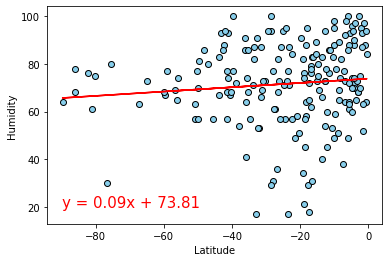

In [54]:
xlabel = "Latitude"
ylabel = "Humidity"
labelpos = (-90,20)
file_name = "part2_south_humidityVSlat"
run_LinearRegression(southern_hemisphere_weather_df[xlabel],southern_hemisphere_weather_df[ylabel],
                     xlabel,ylabel,labelpos,file_name)

Analysis : ->Southern Hemisphere cities have very week co-realation with Humidity. As relation value shows the value -0.00371 which is very very far to 1 ans also from above graph as cities which are away from equator or near to equator does not show much difference in humidity.

#### Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
- Plot  Linear Regression Northern Hemisphere - Cloudiness (%) vs. Latitude

The relation value is: 0.27703656527201886


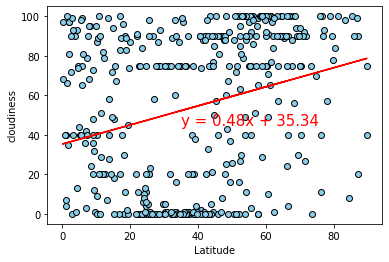

In [55]:
xlabel = "Latitude"
ylabel = "cloudiness"
labelpos = (35,45)
file_name = "part2_north_cloudinessVSlat"
run_LinearRegression(northern_hemisphere_weather_df[xlabel],northern_hemisphere_weather_df[ylabel],
                     xlabel,ylabel,labelpos,file_name)

Analysis : ->Northern Hemisphere cities have very week co-realation with Cloudiness. As relation value shows the value 0.133 which is very far to 1 also from above graph as cities which are away from equator or near to equator does not show much difference in Cloudiness.

#### Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
- Plot Southern Hemisphere - Cloudiness (%) vs. Latitude  Linear Regression

The relation value is: 0.13726475763924761


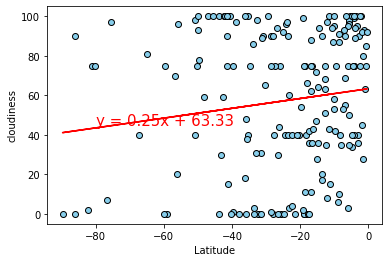

In [56]:
xlabel = "Latitude"
ylabel = "cloudiness"
labelpos = (-80,45)
file_name = "part2_south_cloudinessVSlat"
run_LinearRegression(southern_hemisphere_weather_df[xlabel],southern_hemisphere_weather_df[ylabel],
                     xlabel,ylabel,labelpos,file_name)

Analysis : ->Southern Hemisphere cities have very very week co-realation with Cloudiness. As relation value shows the value -0.030326 which is very very far to 1 also from above graph as cities which are away from equator or near to equator does not show much difference in Cloudiness.

#### Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
- Plot Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The relation value is: 0.08463374156414231


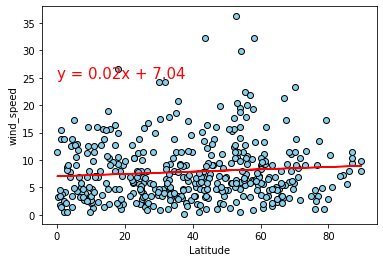

In [57]:
xlabel = "Latitude"
ylabel = "wind_speed"
labelpos = (0,25)
file_name = "part2_north_windspeedVSlat"
run_LinearRegression(northern_hemisphere_weather_df[xlabel],northern_hemisphere_weather_df[ylabel],
                     xlabel,ylabel,labelpos,file_name)

Analysis : ->Northern Hemisphere cities have very week co-realation with Wind Speed. As relation value shows the value 0.06404 which is very very far to 1 also from above graph as cities which are away from equator or near to equator does not show much difference in wind speed.

#### Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
- Plot Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The relation value is: -0.21049249426248653


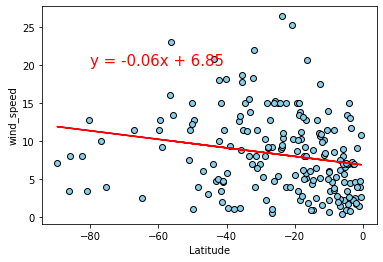

In [58]:
xlabel = "Latitude"
ylabel = "wind_speed"
labelpos = (-80,20)
file_name = "part2_south_windspeedVSlat"
run_LinearRegression(southern_hemisphere_weather_df[xlabel],southern_hemisphere_weather_df[ylabel],
                     xlabel,ylabel,labelpos,file_name)

Analysis : ->Southern Hemisphere cities have very very week co-realation with Wind Speed. As relation value shows the value 0.0206599 which is very very far to 1 also from above graph as cities which are away from equator or near to equator does not show much difference in wind speed.